# Data Generation:

In [100]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

In [23]:
def gauss_data_gen(num_sam, N):
    cov   = np.diag(np.random.rand(N)*10)
    mean  = np.random.rand(N)*10
    dist  = stats.multivariate_normal(mean, cov)
    samp  = dist.rvs(num_sam)
    return samp

In [24]:
def data_generator(num_of_gauss, dimension, num_sample):
    data = []
    for i in range(0, num_of_gauss):
        X = gauss_data_gen(num_sample, dimension)
        data = np.append(data, X) 

    data = np.array(data).reshape(int(len(data)/dimension), dimension)
    return data

# EM Algorithm Functions:

In [57]:
def parameter_init(n, X):
    ## random initialisation of parameters:
    X     = np.array(X);
    dim   = X.shape[1]
    N     = X.shape[0]
    w     = np.random.rand(n)*5
    mu    = np.random.rand(n, dim)*5
    sigma = []

    for i in range(0, n):
        sigma.append(np.diag((np.random.rand(dim)+np.ones(dim)*3)*10))

    return w, mu, sigma;

def rho_vector(n, X, mu, sigma):
    rho = []
    for k in range(0, n):
        y = stats.multivariate_normal.pdf(X, mu[k], sigma[k]);
        rho.append(y)
    return rho;

def cond_prob_count(n, X, w, mu, sigma):

    X     = np.array(X);
    dim   = X.shape[1]
    N     = X.shape[0]
    G     = np.zeros([N, n])
    for i in range(0, N):
        rho = rho_vector(n, X[i,:], mu, sigma)
        for k in range(0, n):
            G[i][k] = w[k]*rho[k]/np.dot(w, rho)
    return np.array(G);

def Q_to_max(n, X, w, mu, sigma, G):
    X     = np.array(X);
    dim   = X.shape[1]
    N     = X.shape[0]
    LL = 0;
    for i in range(0, N):
        for j in range(0, n):
            LL += G[i][j]*(math.log(w[j])-1/2*math.log(np.linalg.det(sigma[j])) - dim/2*math.log(2*math.pi)-1/2*np.matmul(np.matmul((X[i,:]-mu[j]), np.linalg.inv(sigma[j])), (X[i,:]-mu[j]).T))
    return LL

def new_w(G):
    N = G.shape[0]
    return np.sum(G, axis = 0)/N;

def new_mu(G, X, n):
    mu = np.array([])
    G_sum = np.sum(G, axis = 0)
    mu = np.matmul(G.T, X)
    for j in range(0, n):
        mu[j,:] /= G_sum[j]
    return mu

def new_sigma(G, X, n, mu):
    sigma = []
    X     = np.array(X)
    N     = X.shape[0]
    dim   = X.shape[1]
    G_sum = np.sum(G, axis = 0)
    for j in range(0, n):
        sum_ = np.zeros([dim, dim]);
        for i in range(0, N):  
            sum_ += G[i][j]*np.outer((X[i,:] - mu[j]), (X[i,:] - mu[j]))
        sigma.append(sum_/np.sum(G[:,j]))
    return sigma;

In [26]:
# на этих данных можно проверить разделение двух гауссиан на плоскости
# import pandas as pd
# data = pd.read_csv('asd.txt', header=-1, sep = ' ')
# X = data[[1, 2]].dropna().values.tolist()
# X = np.array(X)


1.3041479928303943
0.19714887051986807
0.2943613459217431
0.3911781952533602
0.4868525458430213
0.5773651680251533
0.6572220633918278
0.721542535714434
0.7676587229912002
0.7957471422821527
0.8084472705338612
0.8098345510886702
0.8042715536282685
0.7955390844128942
0.7863995962250101
0.7785370427147882
0.7727257811354775
0.769086817395646
0.7673381391973635
0.7669953644772249
0.7675124575362133
0.7683692850766874
0.769118647891446
0.769405472927474
0.7689686088713188
0.7676329702601379
0.7652973779681815
0.7619215558495398
0.7575143443677916
0.7521241948702482
0.7458323247685712
0.7387484738144394
0.7310089505813266
0.722776554982147
0.7142419709364276
0.7056263130998559
0.6971846561589246
0.6892105548024574
0.682041763635425
0.6760675848490791
0.6717385122717587
0.6695791174215628
0.6702054614409008
0.6743487513995206
0.6828875384903768
0.6968915419131463
0.7176812520347085
0.7469089073415489
0.7866683289378216
0.839643447663093
0.909307988329374
1.000190984555502
1.118222667348391
1.

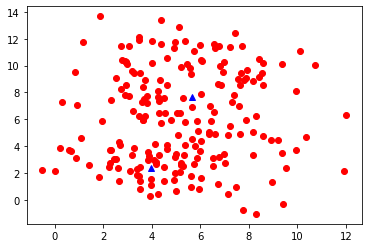

Mean: 
 [5.67485335 7.63058162]
Variance: 
 [[ 5.53582424 -1.5558265 ]
 [-1.5558265   9.00389279]]
Mean: 
 [3.96244299 2.39205574]
Variance: 
 [[ 4.03573695 -1.01602562]
 [-1.01602562  1.3719665 ]]


In [106]:
# количество гауссиан
num_of_gauss = 2
# n-мерность точек
dimension = 2
# количество сэмплов в выборке
num_sample = 100
# точность
eps = 10e-10;

data = data_generator(num_of_gauss, dimension, num_sample)
# print(data)

#random initialisation:
w, mu, sigma = parameter_init(num_of_gauss, data);
G = cond_prob_count(num_of_gauss, data, w, mu, sigma);
L0 = Q_to_max(num_of_gauss, data, w, mu, sigma, G)


#iterations:
while True:
    w = new_w(G)
    mu = new_mu(G, data, num_of_gauss)
    sigma = new_sigma(G, data, num_of_gauss, mu)
    G = cond_prob_count(num_of_gauss, data, w, mu, sigma)
    L1 = Q_to_max(num_of_gauss, data, w, mu, sigma, G)
    print(abs(L1-L0))
    if abs(L1-L0) < eps:
        break
    L0 = L1;
    
plt.scatter(data[:, 0], data[:, 1], c = 'red')
plt.plot(mu[:, 0], mu[:, 1], '^', c='blue')
plt.show()
    
    
for j in range(0, num_of_gauss):
    print("Mean: \n", mu[j])
    print("Variance: \n", sigma[j])
    
